# Data Wrangling

In [169]:
# import packages
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Cleaning - takehome_users.csv

In [170]:
# load data as pandas dataframe
users_df = pd.read_csv('takehome_users.csv', encoding='latin-1')
users_df['creation_time'] = pd.to_datetime(users_df['creation_time'])
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [171]:
# inspect data
print(users_df.shape)
users_df.info()

(12000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [173]:
# check for null values
users_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [175]:
# fill in null values with 0
for i in ['last_session_creation_time','invited_by_user_id']:
    users_df.loc[users_df[i].isnull(), i] = 0

### Data Cleaning - takehome_user_engagement.csv

In [176]:
# load data
eng_df = pd.read_csv('takehome_user_engagement.csv')
eng_df['time_stamp'] = pd.to_datetime(eng_df['time_stamp'])
eng_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [177]:
# inspect data
print(eng_df.shape)
eng_df.info()

(207917, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [178]:
# check for null values
eng_df.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

## Exploratory Data Analysis

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, **identify which factors predict future user adoption**.

We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [179]:
users_df['adopted'] = False
eng_df['date'] = eng_df.time_stamp.dt.date
new_eng_df = eng_df.groupby('user_id')

In [180]:
# find adopted users

for name, group in new_eng_df:
    n = len(group)
    if n >= 3:       # if user logged in on at least 3 different days
        tg = group['date'].drop_duplicates().reset_index(drop=True)
        for i in range(n - 2):
            delta = tg[i + 2] - tg[i]
            if delta.days < 7:      # 7 day period
                users_df.loc[users_df['object_id']==name, 'adopted'] = True
                break

In [181]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


Number of Adopted Users: 1602
Total Number of Users: 12000


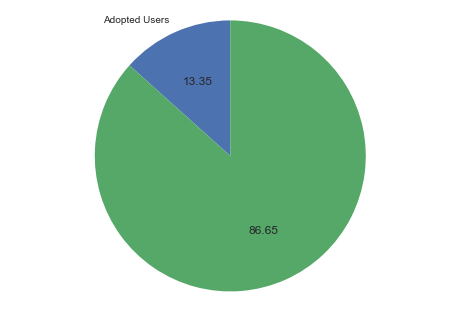

In [182]:
adopted_count = len(users_df[users_df['adopted']==True])
other_count = len(users_df) - len(users_df[users_df['adopted']==True])
print('Number of Adopted Users:', adopted_count)
print('Total Number of Users:', len(users_df))

labels = ['Adopted Users', '']
values = [adopted_count, other_count]

figureObject, axesObject = plt.subplots()

axesObject.pie(values, labels=labels, autopct='%1.2f', startangle=90)
axesObject.axis('equal')
plt.show()

In [183]:
users_df.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

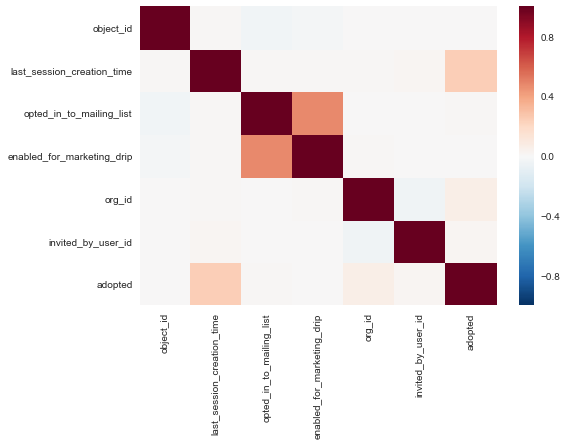

In [184]:
sns.heatmap(users_df.corr())
plt.show()

- The only variables that have a correlation with adopted users are **last session creation time** and **org id**

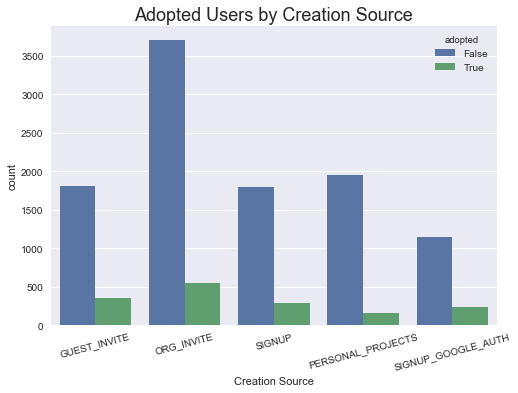

In [185]:
sns.set()

sns.countplot(data=users_df, x='creation_source', hue='adopted')
plt.title('Adopted Users by Creation Source', fontsize=18)
plt.xlabel('Creation Source')
plt.xticks(rotation=15)
plt.show()

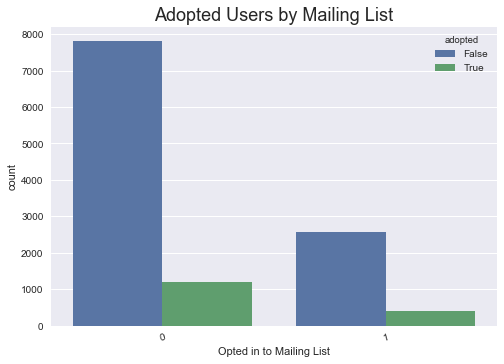

In [186]:
sns.set()

sns.countplot(data=users_df, x='opted_in_to_mailing_list', hue='adopted')
plt.title('Adopted Users by Mailing List', fontsize=18)
plt.xlabel('Opted in to Mailing List')
plt.xticks(rotation=15)
plt.show()

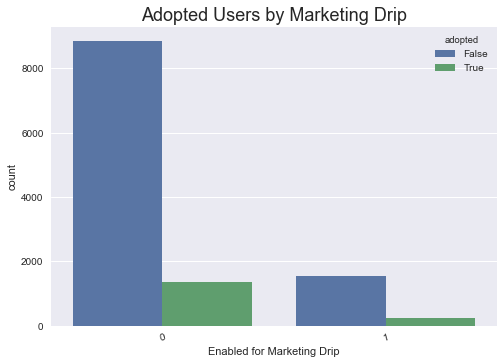

In [187]:
sns.set()

sns.countplot(data=users_df, x='enabled_for_marketing_drip', hue='adopted')
plt.title('Adopted Users by Marketing Drip', fontsize=18)
plt.xlabel('Enabled for Marketing Drip')
plt.xticks(rotation=15)
plt.show()

## Machine Learning

In [188]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, roc_curve, roc_auc_score,
                            precision_score, recall_score)

In [189]:
# creation source diction
diction = dict(zip(users_df['creation_source'].unique(),np.arange(0,len(users_df['creation_source'].unique()))))

# change variable
users_df['creation_source'] = users_df['creation_source'].apply(lambda x: diction[x])

def formatdate(df,col):
    df[col + '_' 'year'] = df[col].dt.year
    df[col + '_' 'month'] = df[col].dt.month
    df[col + '_' 'day'] = df[col].dt.day
    df[col + '_' 'hour'] = df[col].dt.hour
    
formatdate(users_df,'creation_time')

In [190]:
# create values (X) and target (y) 
X = users_df.drop(['adopted','email','name','object_id','creation_time',
                   'last_session_creation_time'], axis=1)
y = users_df['adopted']


In [191]:
X.shape

(12000, 9)

In [192]:
y.shape

(12000,)

In [194]:
# balance the data - SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(ratio='auto', kind='regular')
X_smote , y_smote = sm.fit_sample(X, y)

print('SMOTE Features Set:', X_smote.shape)
print('SMOTE Training Set:', y_smote.shape)

SMOTE Features Set: (20796, 9)
SMOTE Training Set: (20796,)


In [207]:
# train / test with balanced data using SMOTE
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote, random_state=42)
print('Features Training Set:', X_train_sm.shape, 'Features Testing Set:', X_test_sm.shape)
print('Target Training Set:', y_train_sm.shape, 'Target Testing Set:', y_test_sm.shape)

Features Training Set: (15597, 9) Features Testing Set: (5199, 9)
Target Training Set: (15597,) Target Testing Set: (5199,)


In [196]:
# train / test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('Features Training Set:', X_train.shape, 'Features Testing Set:', X_test.shape)
print('Target Training Set:', y_train.shape, 'Target Testing Set:', y_test.shape)

Features Training Set: (9000, 9) Features Testing Set: (3000, 9)
Target Training Set: (9000,) Target Testing Set: (3000,)


In [198]:
# RANDOM FOREST  - imbalanced data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
rf_roc = roc_auc_score(y_test, y_pred_prob_rf)

# RANDOM FOREST - balanced data using SMOTE
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)
y_pred_rf_sm = rf.predict(X_test_sm)
y_pred_prob_rf_sm = rf.predict_proba(X_test_sm)[:,1]
rf_sm_roc = roc_auc_score(y_test_sm, y_pred_prob_rf_sm)

In [199]:
roc = [('Random Forest',
          '{:.2%}'.format(rf_roc), 
          '{:.2%}'.format(rf_sm_roc))]

labels = ['Classifier', 'Imbalanced', 'SMOTE']
df = pd.DataFrame.from_records(roc, columns=labels)
df

,Classifier,Imbalanced,SMOTE
0,Random Forest,56.70%,94.38%


In [213]:
# tune parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(10,50,10),
              'min_samples_leaf': np.arange(1,50,10),
              'max_features': ['auto', 'sqrt', 'log2']}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train_sm, y_train_sm)

print(rf_cv.best_params_)
print(rf_cv.best_score_)

ne=rf_cv.best_params_['n_estimators']
msl=rf_cv.best_params_['min_samples_leaf']
mf=rf_cv.best_params_['max_features']

{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 40}
0.908508046419


In [214]:
# tuned model
# Create the classifier
rf = RandomForestClassifier(n_estimators=ne,
                            min_samples_leaf=msl,
                            max_features=mf)

# Fit the classifier to the training data
rf.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred_rf = rf.predict(X_test_sm)

# PREDICTION PROBABILITIES
y_pred_prob_rf = rf.predict_proba(X_test_sm)[:,1]

In [217]:
# tuned model, balanced data

print('ROC AUC Score:','{:.2%}'.format(roc_auc_score(y_test_sm, y_pred_prob_rf)))
print('Test Accuracy:', '{:.2%}'.format(accuracy_score(y_test_sm, y_pred_rf)))
print('Precision:','{:.2%}'.format(precision_score(y_test_sm, y_pred_rf)))
print('Recall:', '{:.2%}'.format(recall_score(y_test_sm, y_pred_rf)))

print('\n Clasification Report:\n', classification_report(y_test_sm, y_pred_rf))

ROC AUC Score: 94.98%
Test Accuracy: 91.34%
Precision: 97.88%
Recall: 84.34%

 Clasification Report:
              precision    recall  f1-score   support

      False       0.86      0.98      0.92      2625
       True       0.98      0.84      0.91      2574

avg / total       0.92      0.91      0.91      5199



In [212]:
feature_imp = pd.DataFrame({'features':X_test.columns,
    'importances':rf.feature_importances_})

feature_imp.sort_values('importances',ascending=False)

,features,importances
5,creation_time_year,0.243656
0,creation_source,0.130317
3,org_id,0.115883
6,creation_time_month,0.108170
1,opted_in_to_mailing_list,0.095548
7,creation_time_day,0.086205
8,creation_time_hour,0.080810
2,enabled_for_marketing_drip,0.075428
4,invited_by_user_id,0.063982


## Conclusion 
- The only variables that have a correlation with adopted users are last session creation time and org_id
- The model shows that the most important features in predicting an adopted user is creation_time_year
- Using balanced data and hypertuning the parameters improved the performance metrics greatly.